In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import copy
from collections import Counter
import nltk

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PragathiPC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Question a - Word lengths distribution

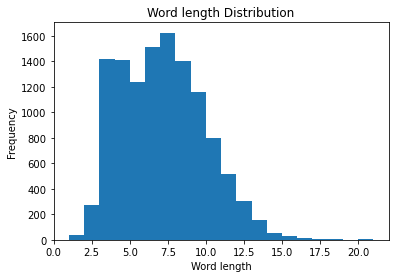

In [249]:
data = pd.read_csv("acq.csv", sep=',')
data.drop(['Unnamed: 0'],axis=1,inplace=True)

words = data['col'].str.lower().str.findall("\w+")
uniqueWords = set() #unique words using set

for word in words:
    uniqueWords.update(word)
    
lengths=[]
for x in uniqueWords:
    lengths.append(len(x))  #appending lengths of the words to list

plt.title('Word length Distribution')
plt.xlabel('Word length')
plt.ylabel('Frequency')
plt.hist(lengths,bins=20)
plt.show()


# Question b - Sentence length distribution

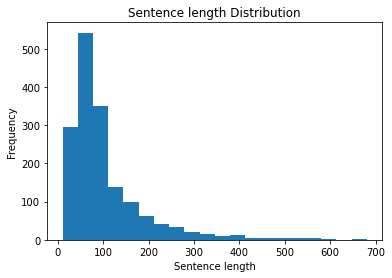

In [335]:
sentences = data['col'].str.split('.') #Splitting document by . which is a sentence
lengths=[]

for sentence in sentences:
    eachSentence = ' '.join(sentence)
    wordsInSentence = eachSentence.split() #split sentence by space to find number of words in a sentence
    lengths.append(len(wordsInSentence))


plt.title('Sentence length Distribution')
plt.xlabel('Sentence length')
plt.ylabel('Frequency')
plt.hist(lengths,bins=20)
plt.show()

# Question c - Top 10 frequent words

     Words  Frequency
0     said       5000
1       lt       2784
2     dlrs       2009
3      the       1672
4  company       1651
5      mln       1638
6      inc       1448
7   shares       1425
8      pct       1399
9     corp       1158


C:\Users\PragathiPC\AppData\Local\Temp\ipykernel_5544\1566497285.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['col_processed'] = data['col_stop'].str.lower().str.replace(('\;|\&|\>|\-|\,|\.|\'|\"|\/|\)|\('),'')


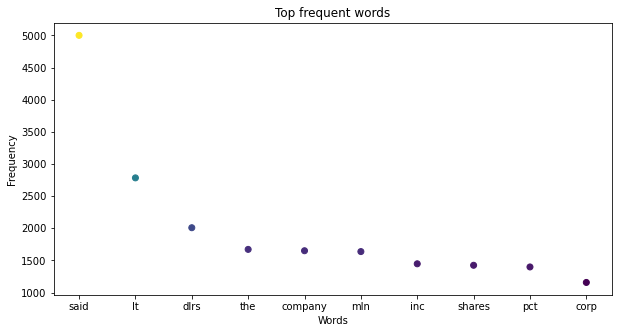

In [319]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopWords = stopwords.words('english')

#remove stop words
data['col_stop']  = data['col'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopWords]))

#replace punctuations and symbols with empty space
data['col_processed'] = data['col_stop'].str.lower().str.replace(('\;|\&|\>|\-|\,|\.|\'|\"|\/|\)|\('),'')

dataString = ' '.join(data['col_processed'])
processedSeries = pd.Series(dataString.split(),name="Frequency").value_counts()[:10]
processedFrame = pd.DataFrame({'Words':processedSeries.index, 'Frequency':processedSeries.values})

#print frequent words
print(processedFrame)

#plot chart
plt.title('Top frequent words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.gcf().set_size_inches((10, 5))    
plt.scatter(processedFrame['Words'],processedFrame['Frequency'],c=processedFrame[['Frequency']].to_numpy(),cmap='viridis')
plt.show()



# Question d - Bigram Frequency

         Bigrams  Frequency
0       mln dlrs        982
1   company said        460
2            u s        436
3       inc said        421
4    the company        378
5      corp said        303
6        it said        283
7      per share        263
8     dlrs share        248
9   common stock        222


<AxesSubplot:ylabel='Bigrams'>

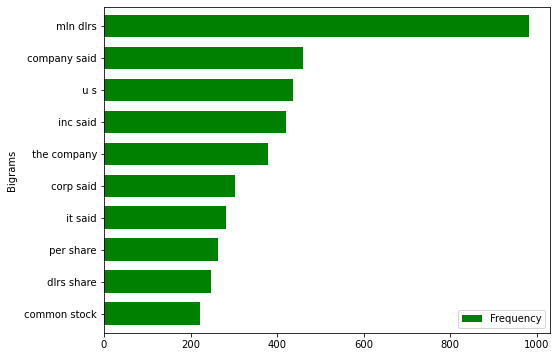

In [339]:
bigramString = ' '.join(data['col_processed'])
bigram = list(nltk.bigrams(bigramString.split()))

strBigram = ', '.join(' '.join((word1, word2)) for word1, word2 in bigram)
#Converting string to panda Series
processedBigramSeries = pd.Series(strBigram.split(',')).value_counts()[:10]

#Converting string to panda Dataframe and assigning column names
processedBigramFrame = pd.DataFrame({'Bigrams':processedBigramSeries.index, 'Frequency':processedBigramSeries.values})

#print frequent bigrams
print(processedBigramFrame)

colors = ['plum','coral','lightpink','peachpuff','orange','gray','paleturquoise','mediumseagreen'] #color palette
bigramLabels = processedBigramFrame['Bigrams'] # Label names


#plot pie chart for Bigrams
processedBigramFrame.sort_values('Frequency',inplace=True)
processedBigramFrame.plot.barh(x='Bigrams', y='Frequency',color='green',width = 0.7,figsize=(8,6))


# Question e - Trigram Frequency

                          Trigrams  Frequency
0                 the company said        280
1   securities exchange commission        168
2                   dlrs per share        151
3       filing securities exchange         78
4            pct total outstanding         74
5             in filing securities         69
6                    mln dlrs cash         62
7                       5 mln dlrs         59
8                    dlr per share         58
9             signed letter intent         54


<AxesSubplot:title={'center':'Trigram Frequency'}, ylabel='Frequency'>

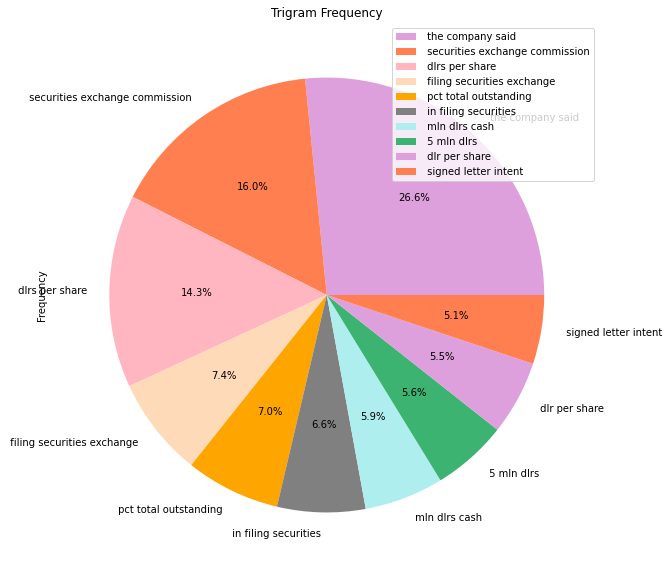

In [312]:
trigramString = ' '.join(data['col_processed'])
trigram = list(nltk.trigrams(trigramString.split()))

strTrigram = ', '.join(' '.join((word1, word2, word3)) for word1, word2, word3 in trigram)
processedTrigramSeries = pd.Series(strTrigram.split(',')).value_counts()[:10]

#Converting string to panda Dataframe and assigning column names
processedTrigramFrame = pd.DataFrame({'Trigrams':processedTrigramSeries.index, 'Frequency':processedTrigramSeries.values})

#print frequent trigrams
print(processedTrigramFrame)

#chart fields
colors = ['plum','coral','lightpink','peachpuff','orange','gray','paleturquoise','mediumseagreen'] #color palette
trigramLabels = processedTrigramFrame['Trigrams'] # Label names

#plot pie chart for Trigrams
processedTrigramFrame.plot.pie(y='Frequency', figsize=(15, 10),autopct='%1.1f%%',colors=colors,title="Trigram Frequency",labels=trigramLabels)

